In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

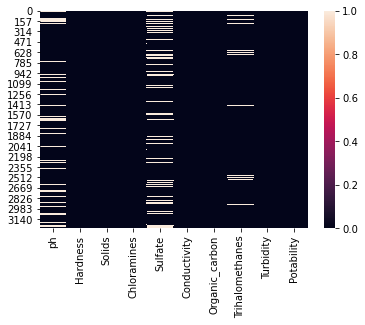

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [12]:
df.ph = df.ph.fillna(df.ph.mean())
df.Sulfate = df.Sulfate.fillna(df.Sulfate.mean())
df.Trihalomethanes = df.Trihalomethanes.fillna(df.Trihalomethanes.mean())

In [13]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

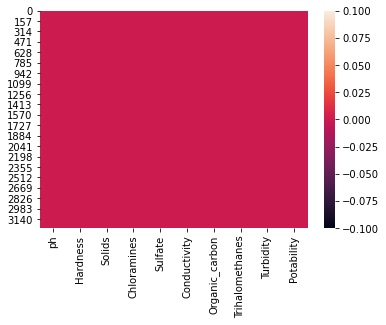

In [14]:
sns.heatmap(df.isnull())

In [15]:
value = df.	Potability.value_counts()

<BarContainer object of 2 artists>

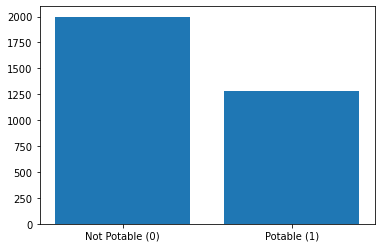

In [16]:
plt.bar(["Not Potable (0)","Potable (1)"],value)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [18]:
x = df.drop(['Potability'], axis = 'columns')

In [19]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [20]:
y = df.Potability

In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [22]:
x.shape, y.shape

((3276, 9), (3276,))

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)

In [24]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1396,10.202972,211.963404,21708.949286,7.491895,333.775777,395.140783,21.520593,62.659460,3.270904
1426,7.042794,194.046719,16733.124103,7.701926,350.243966,504.925466,19.703422,82.253454,3.965647
911,7.080795,214.172330,8985.911807,7.297973,333.775777,498.803917,9.583323,37.616485,5.504749
191,7.593128,261.566173,18371.057201,6.297543,333.775777,387.629572,16.575981,51.830948,3.377338
1577,7.565198,213.428269,11246.426646,8.208678,377.221672,341.716459,15.669955,67.230057,5.185000
...,...,...,...,...,...,...,...,...,...
2763,6.359431,208.203021,23347.172710,9.000395,333.775777,336.585610,14.173906,66.396293,3.636495
905,7.080795,192.202168,34160.925144,8.963156,363.472798,474.781734,15.905270,50.807825,2.998335
1096,7.080795,142.145566,45141.686036,6.030640,240.198505,369.280429,20.605552,70.168389,4.604725
235,4.814136,205.214041,17650.405049,8.121080,350.487939,414.030709,10.999416,47.402666,5.190852


In [25]:
y_train

1396    0
1426    0
911     0
191     0
1577    1
       ..
2763    1
905     0
1096    1
235     0
1061    0
Name: Potability, Length: 2194, dtype: int64

# Using Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [27]:
model = LogisticRegression()

In [28]:
model.fit(x_train, y_train)

LogisticRegression()

In [29]:
LgPred = model.predict(x_test)

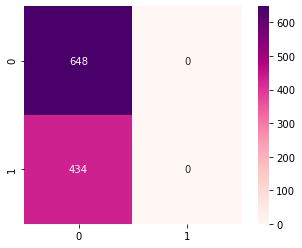

In [30]:
lc_matrix = confusion_matrix(y_test, LgPred)
axes = sns.heatmap(lc_matrix, square  = True, annot = True, fmt = 'd', cbar = True, cmap = plt.cm.RdPu)

In [31]:
Lgaccuracy = accuracy_score(y_test, LgPred)
Lgaccuracy

0.5988909426987061

In [32]:
print(classification_report(y_test,LgPred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       648
           1       0.00      0.00      0.00       434

    accuracy                           0.60      1082
   macro avg       0.30      0.50      0.37      1082
weighted avg       0.36      0.60      0.45      1082



F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
model.predict_proba(x_test)

array([[0.60298345, 0.39701655],
       [0.6175281 , 0.3824719 ],
       [0.55925494, 0.44074506],
       ...,
       [0.62523833, 0.37476167],
       [0.62133659, 0.37866341],
       [0.60444574, 0.39555426]])

# Using Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model = DecisionTreeClassifier()

In [36]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
dPred = model.predict(x_test)

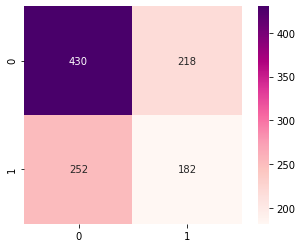

In [38]:
dtc_matrix = confusion_matrix(y_test, dPred)
axes = sns.heatmap(dtc_matrix, square  = True, annot = True, fmt = 'd', cbar = True, cmap = plt.cm.RdPu)

In [39]:
dAccuracy = accuracy_score(y_test, dPred)
dAccuracy

0.5656192236598891

In [40]:
print(classification_report(y_test,dPred))

              precision    recall  f1-score   support

           0       0.63      0.66      0.65       648
           1       0.46      0.42      0.44       434

    accuracy                           0.57      1082
   macro avg       0.54      0.54      0.54      1082
weighted avg       0.56      0.57      0.56      1082



# Using Support Vector Machine

In [41]:
from sklearn.svm import SVC

In [42]:
model_svm = SVC()

In [43]:
model_svm.fit(x_train, y_train)

SVC()

In [44]:
pred_svm = model_svm.predict(x_test)

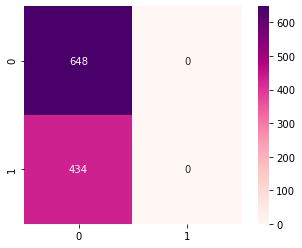

In [45]:
svm_matrix = confusion_matrix(y_test, pred_svm)
axes = sns.heatmap(svm_matrix , square  = True, annot = True, fmt = 'd', cbar = True, cmap = plt.cm.RdPu)

In [46]:
svmAaccuracy = accuracy_score(y_test, pred_svm)
svmAaccuracy

0.5988909426987061

In [47]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       648
           1       0.00      0.00      0.00       434

    accuracy                           0.60      1082
   macro avg       0.30      0.50      0.37      1082
weighted avg       0.36      0.60      0.45      1082



F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Using Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rNd_model = RandomForestClassifier(n_estimators = 450)

In [50]:
rNd_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=450)

In [51]:
rndPred = rNd_model.predict(x_test)

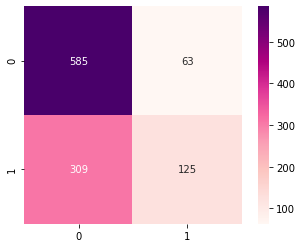

In [52]:
rfc_matrix = confusion_matrix(y_test, rndPred)
axes = sns.heatmap(rfc_matrix , square  = True, annot = True, fmt = 'd', cbar = True, cmap = plt.cm.RdPu)

In [53]:
rndAaccuracy = accuracy_score(y_test, rndPred)
rndAaccuracy

0.6561922365988909

In [54]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       648
           1       0.00      0.00      0.00       434

    accuracy                           0.60      1082
   macro avg       0.30      0.50      0.37      1082
weighted avg       0.36      0.60      0.45      1082



F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy_score
3,Random Forest Classifier,0.656192
0,Logistic Regression,0.598891
2,Support Vector Machine,0.598891
1,Decision Tree,0.565619


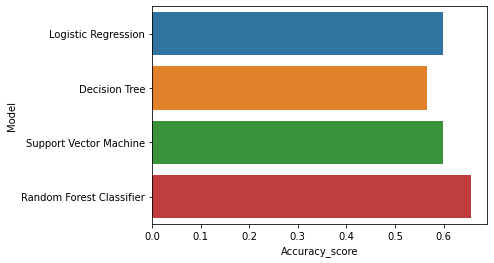

In [55]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree','Support Vector Machine','Random Forest Classifier'],
    'Accuracy_score' :[Lgaccuracy, dAccuracy, svmAaccuracy, rndAaccuracy]
})
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)